In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/pinito2002/aprendizaje_no_supervizado/main/data/retailmax.csv")

In [8]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [10]:
type(scaled_features)

numpy.ndarray

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [12]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1], dtype=int32)

In [13]:
len(clusters)

200

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [15]:
clusters

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1,
       0, 1, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1,
       4, 4, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1,
       1, 4, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 4, 4, 4, 4,
       4, 1, 3, 1, 1, 1, 4, 4, 4, 4, 1, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [16]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [17]:
clusters

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [18]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
df['clasificación'] = clusters
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clasificación
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [20]:
df['clasificación'].value_counts()

,count
clasificación,
0,65
2,57
1,40
3,38


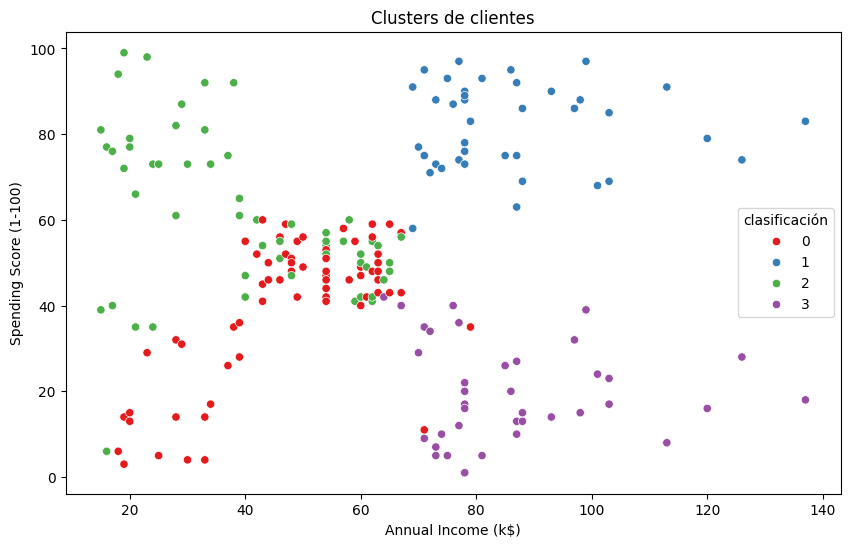

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='clasificación', palette='Set1')
plt.title('Clusters de clientes')
plt.show()

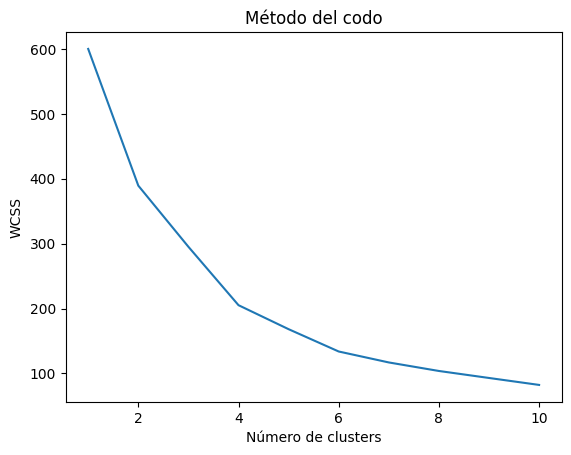

In [24]:
# Función para calcular la Suma de Cuadrados Dentro del Cluster (WCSS)
def calcular_wcss(datos):
    wcss = []
    for n in range(1, 11):
        kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(datos)
        wcss.append(kmeans.inertia_)
    return wcss


# Calcular el WCSS para diferentes números de clusters
wcss = calcular_wcss(scaled_features)

# Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


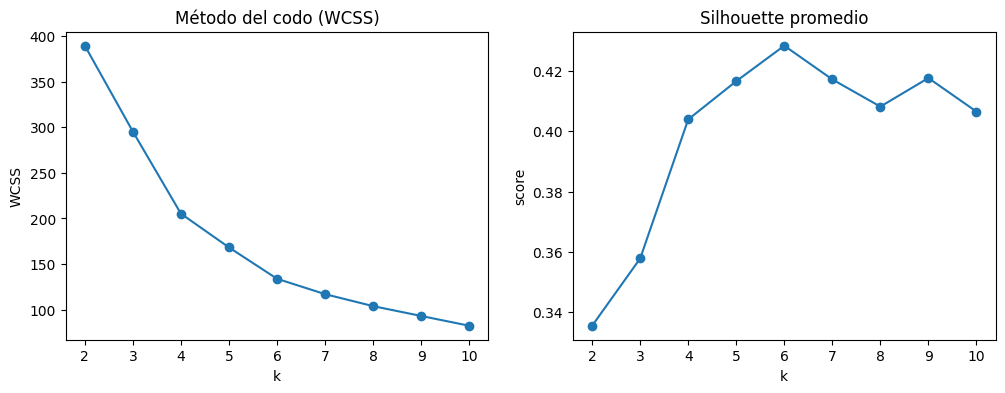

,k,WCSS,Silhouette
0,2,389.386189,0.335472
1,3,295.212246,0.357793
2,4,205.225147,0.403958
3,5,168.247580,0.416643
4,6,133.868421,0.428417
5,7,117.011555,0.417232
6,8,103.873292,0.408207
7,9,93.092891,0.417693
8,10,82.385154,0.406554


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Usamos las features ya escaladas (scaled_features) que tienes arriba.
# Si no existen en tu sesión, descomenta estas dos líneas:
# from sklearn.preprocessing import StandardScaler
# scaled_features = StandardScaler().fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

Ks = range(2, 11)
wcss = []
sil = []

for k in Ks:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    labels = km.fit_predict(scaled_features)
    wcss.append(km.inertia_)
    sil.append(silhouette_score(scaled_features, labels))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(Ks, wcss, marker='o')
ax[0].set_title('Método del codo (WCSS)')
ax[0].set_xlabel('k')
ax[0].set_ylabel('WCSS')

ax[1].plot(Ks, sil, marker='o')
ax[1].set_title('Silhouette promedio')
ax[1].set_xlabel('k')
ax[1].set_ylabel('score')

plt.show()

import pandas as pd
pd.DataFrame({'k': Ks, 'WCSS': wcss, 'Silhouette': sil})


In [26]:
k_optimo = 5  # número óptimo de clusters
kmeans = KMeans(n_clusters=k_optimo, init='k-means++', n_init=10, max_iter=300, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Ver cuántos clientes hay en cada grupo
df['cluster'].value_counts().sort_index()


,count
cluster,
0,20
1,54
2,40
3,39
4,47


In [27]:
perfil = df.groupby('cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean().round(1)
perfil


,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,46.2,26.8,18.4
1,25.2,41.1,62.2
2,32.9,86.1,81.5
3,39.9,86.1,19.4
4,55.6,54.4,48.9


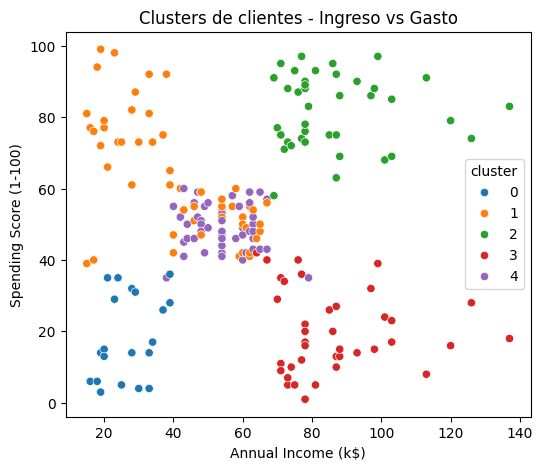

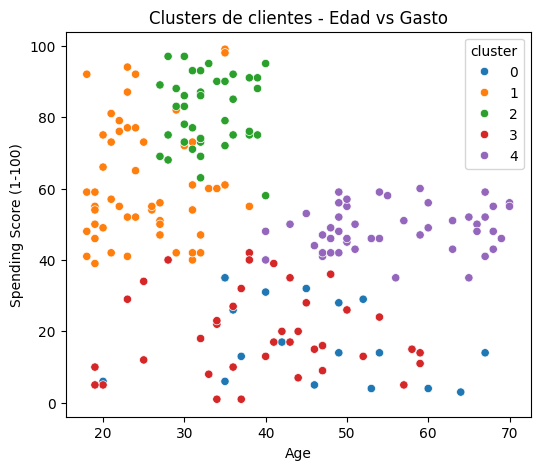

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ingreso vs Spending Score
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='tab10')
plt.title('Clusters de clientes - Ingreso vs Gasto')
plt.show()

# Edad vs Spending Score
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='cluster', palette='tab10')
plt.title('Clusters de clientes - Edad vs Gasto')
plt.show()


In [30]:
import os
os.makedirs("data", exist_ok=True)

df.to_csv('data/retailmax_labeled.csv', index=False)

from google.colab import files
files.download('data/retailmax_labeled.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>